## Test Sumativo: visualizando datos de escuelas y transporte escolar - MCD - Análisis de datos en Python
Tarea calificada • 2 h
Desarrollo Cuestionario • Tomás Barrientos • 12-11-2023

In [1]:
import pandas as pd
import numpy as np
import glob
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebookº
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Creando Dataframes acorde a excel entregado QS4.xlsx


In [3]:
escuelas = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 5/QS4.xlsx',sheet_name = 'Escuelas')
furgones = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 5/QS4.xlsx',sheet_name = 'Furgones')

In [5]:
escuelas

,Escuela,Ubicación en x,Ubicación en y,Tipo,Cantidad de estudiantes
0,Escuela 1,93,63,Básica,507
1,Escuela 2,54,80,Completa,1120
2,Escuela 3,72,28,Media,519
3,Escuela 4,16,14,Media,829
4,Escuela 5,6,86,Completa,727
5,Escuela 6,24,7,Completa,996
6,Escuela 7,99,83,Básica,518
7,Escuela 8,89,22,Básica,1080
8,Escuela 9,63,57,Completa,930
9,Escuela 10,30,55,Completa,723


### Pregunta 1
¿Cuál o cuáles de las siguientes alternativas permita hacer un gráfico de torta con la distribución de la cantidad de estudiantes por tipo de establecimiento educacional? 

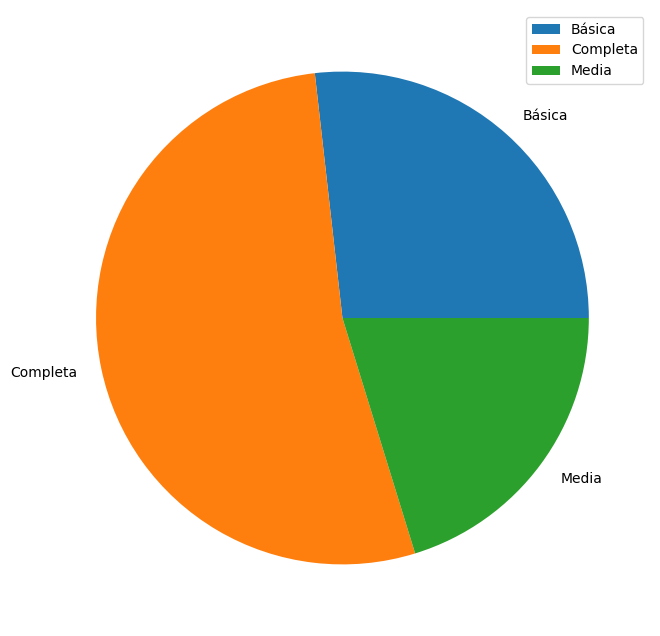

In [9]:
## C)
escuelas[['Tipo','Cantidad de estudiantes']].groupby('Tipo').sum().plot.pie(y='Cantidad de estudiantes', figsize = (8,8))
plt.ylabel('')
plt.show()

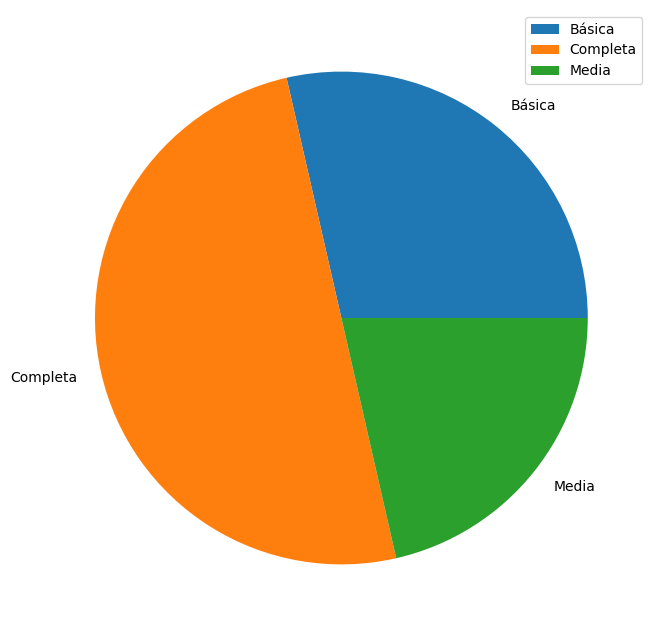

In [10]:
# D)
escuelas[['Tipo','Cantidad de estudiantes']].groupby('Tipo').count().plot.pie(y='Cantidad de estudiantes', figsize = (8,8))
plt.ylabel('')
plt.show()

### Pregunta 2
Considere el siguiente código: 

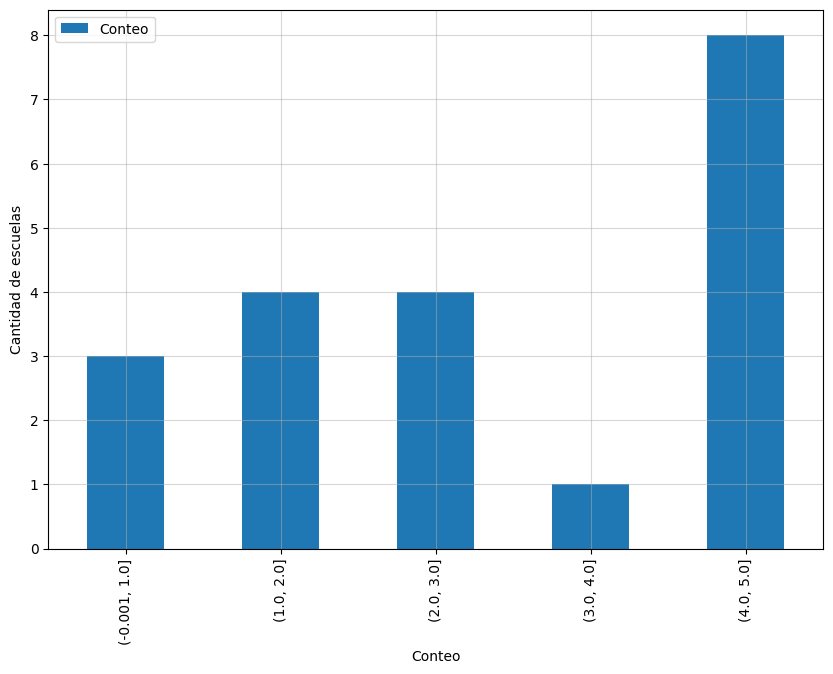

In [11]:
p2 = furgones[['Furgón', 'Escuela a la que pertenece']].groupby('Escuela a la que pertenece').count()
p2['Conteo'] = p2.apply(lambda row: row.Furgón if row.Furgón < 5 else 5, axis = 1)
p2.groupby([pd.cut(p2["Conteo"], np.arange(0, 6, 1), include_lowest = True)]).count().plot(y = 'Conteo', kind='bar', figsize = (10,7))
plt.ylabel('Cantidad de escuelas')
plt.grid(alpha = 0.5)
plt.show()

### Pregunta 3

¿Cuál de las siguientes alternativas corresponde al código para construir un gráfico de dispersión de las ubicaciones de los colegios, y en el que el tamaño del círculo que indica la posición dimensiona la cantidad de estudiantes en ese colegio? 

In [12]:
#A)
escuelas.plot.scatter(s='Cantidad de estudiantes', c = 'Cantidad de estudiantes', colormap = 'plasma', figsize = (15,8))
plt.show()

TypeError: PlotAccessor.scatter() missing 2 required positional arguments: 'x' and 'y'

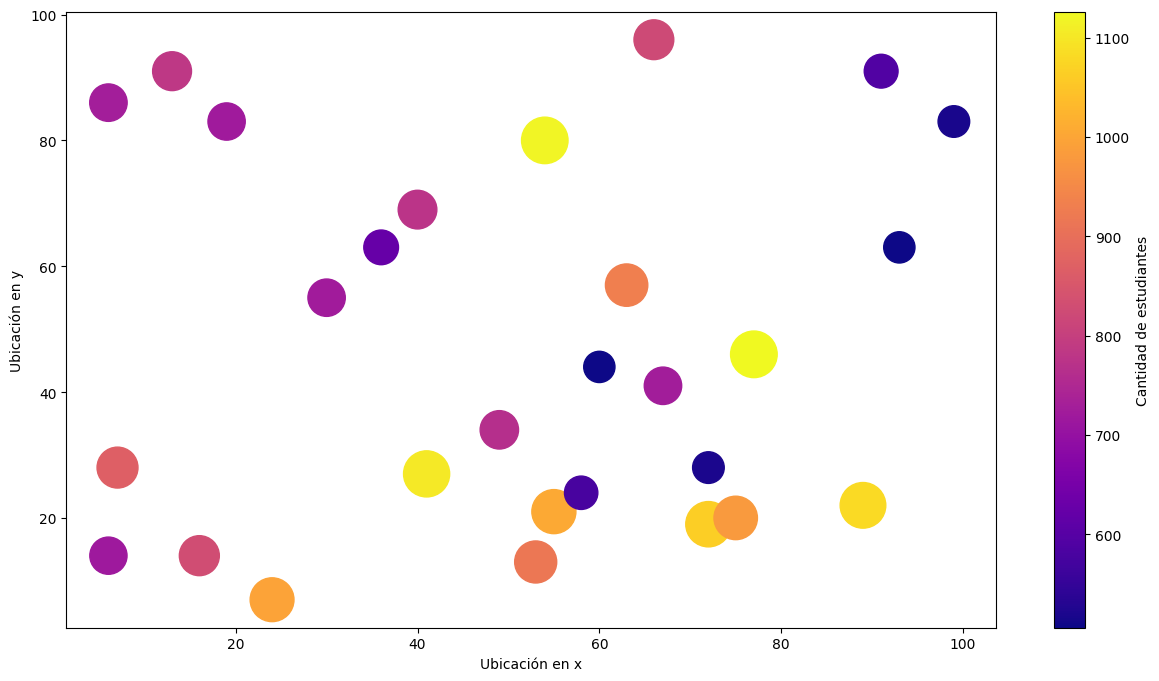

In [13]:
# B)
escuelas.plot.scatter(x='Ubicación en x', y='Ubicación en y', s='Cantidad de estudiantes', c = 'Cantidad de estudiantes', colormap = 'plasma', figsize = (15,8))
plt.show()

In [14]:
# C)
escuelas.plot.scatter(x, y, s='Cantidad de estudiantes', c = 'Cantidad de estudiantes', colormap = 'plasma', figsize = (15,8))
plt.show()

NameError: name 'x' is not defined

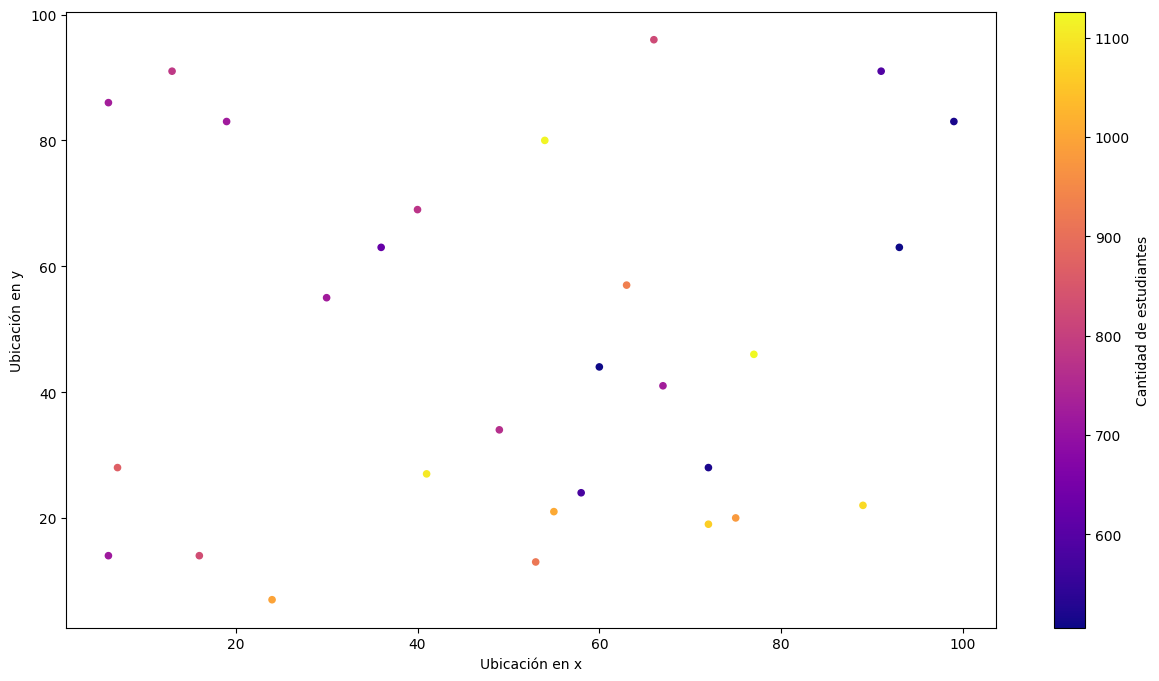

In [15]:
# D)
escuelas.plot.scatter(x='Ubicación en x', y='Ubicación en y', c = 'Cantidad de estudiantes', colormap = 'plasma', figsize = (15,8))
plt.show()

### Pregunta 4

Considere el siguiente código:

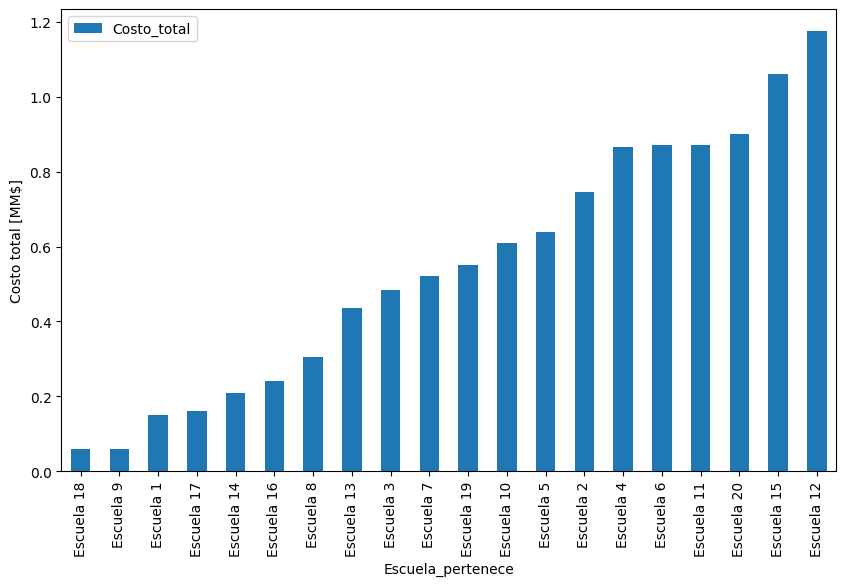

In [16]:
furgones.columns = ['Furgón', 'Escuela_pertenece', 'Capacidad', 'Costo_alumno_año']
furgones['Costo_total'] = furgones.apply(lambda row: row.Capacidad*row.Costo_alumno_año, axis = 1)
furgones[['Escuela_pertenece', 'Costo_total']].groupby('Escuela_pertenece').sum().sort_values(by = 'Costo_total', ascending = True).plot(kind = 'bar', figsize = (10,6))
plt.ylabel('Costo total [MM$]')
plt.show()

### Pregunta 5

Usted quiere hacer un gráfico del tipo MapTree, en el que el primer nivel contiene los tres tipos de capacidad de furgones (20, 30 y 35) y el segundo nivel contiene la cantidad de escuelas diferentes que tienen furgones de esa capacidad (ojo que hay escuelas que tiene más de un furgón del mismo tipo (caso Escuela 2)). ¿Cuál de las siguientes alternativas construye este gráfico?

In [17]:
#A)
p5 = furgones[['Capacidad', 'Escuela_pertenece']].groupby(['Escuela_pertenece', 'Capacidad']).sum().reset_index()
p5 = p5.groupby('Capacidad').count().reset_index()
fig = px.treemap(p5, path=['Capacidad', 'Escuela_pertenece'], values='Escuela_pertenece')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [18]:
#B)
p5 = furgones[['Capacidad', 'Escuela_pertenece']]. (['Escuela_pertenece', 'Capacidad']).sum().reset_index()
p5 = p5.groupby('Capacidad').count().reset_index()
fig = px.treemap(p5, path=['Capacidad', 'Escuela_pertenece'], values='Escuela_pertenece')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

SyntaxError: invalid syntax (1421951808.py, line 2)

In [19]:
#C)
p5 = furgones[['Capacidad', 'Escuela_pertenece']].groupby(['Escuela_pertenece', 'Capacidad']).sum().reset_index()
p5 = p5.groupby('Capacidad')
fig = px.treemap(p5, path=['Capacidad', 'Escuela_pertenece'], values='Escuela_pertenece')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

ValueError: Value of 'values' is not the name of a column in 'data_frame'. Expected one of [0, 1] but received: Escuela_pertenece

In [21]:
#D)
p5 = furgones[['Capacidad', 'Escuela_pertenece']].groupby(['Escuela_pertenece', 'Capacidad']).sum().reset_index()
p5 = p5.groupby('Capacidad').count().reset_index()
fig = px.treemap(p5, path=['Escuela_pertenece'], values='Escuela_pertenece')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()